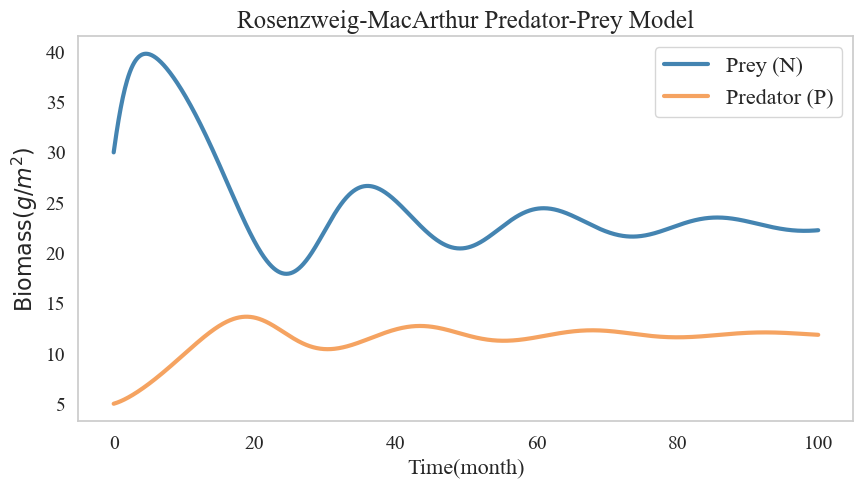

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def rgb_to_mpl(r, g, b):
    return (r/255, g/255, b/255)
# 定义 Rosenzweig-MacArthur 模型的方程
def rosenzweig_macarthur(y, t, r, K, a, h, e, d):
    N, P = y
    dNdt = r * N * (1 - N/K) - (a * N * P) / (h + N)
    dPdt = e * (a * N * P) / (h + N) - d * P
    return [dNdt, dPdt]

# 参数设定
r = 0.8   # 被捕食者增长率
K = 50    # 被捕食者的环境承载力
a = 1.2   # 捕食率
h = 10    # 半饱和常数
e = 0.6   # 捕食效率
d = 0.5   # 捕食者死亡率

# 初始条件
N0 = 30   # 初始被捕食者数量
P0 = 5    # 初始捕食者数量
y0 = [N0, P0]

# 时间范围
t = np.linspace(0, 100, 1000)

# 求解微分方程
solution = odeint(rosenzweig_macarthur, y0, t, args=(r, K, a, h, e, d))
N, P = solution.T

# 绘图
plt.rcParams['font.family']='Times New Roman'
plt.figure(figsize=(10, 5))
plt.tick_params(axis='both', labelsize=14)
plt.plot(t, N, label="Prey (N)", color="#4484B1", linewidth=3)
plt.plot(t, P, label="Predator (P)", color="#F5A361", linewidth=3)
plt.xlabel("Time(month)", fontsize=16)
plt.ylabel(r"$\text{Biomass}(g /m^2)$", fontsize=16)
plt.title("Rosenzweig-MacArthur Predator-Prey Model", fontsize=18)
plt.legend(fontsize=16)
plt.grid()
plt.savefig("RM1.png", dpi=1000)
plt.show()

In [22]:
import pandas as pd

In [25]:
NP={
    "Prey":N,
    "Pryer":P,
    "Time":[i for i in range(len(N))]
}
dfNP=pd.DataFrame(NP)
dfNP.to_csv("NP.csv", index=False)